# Import Necessary Libraries

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [94]:
df_train = pd.read_csv("C:/Users/esrio_0v2bwuf/Desktop/Master_AI/Data_Mining_Techniques/Assignments/Assignment2/Data-Mining-2/Data/training_set_VU_DM.csv")

In [95]:
df_test = pd.read_csv("C:/Users/esrio_0v2bwuf/Desktop/Master_AI/Data_Mining_Techniques/Assignments/Assignment2/Data-Mining-2/Data/test_set_VU_DM.csv")

In [96]:
df_test_train = pd.concat([df_train, df_test], axis=0) #axis=0 means row wise concatenation

# Feature Engineering
- take averages of training and test set at once or just training
- missing values
- which features against eachother
- differences averages
- what has been done already

# Missing Values

### column names

In [97]:
#check all column names
print(df_test_train.columns)

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

### dropped columns: 
 - gross_booking_usd
 - position

In [98]:
#drop the columns position and gross_booking_usd
df_test_train = df_test_train.drop(['gross_bookings_usd', 'position'], axis=1)

### set to 0 if not available:
- comp_rate_percent_diff
- comp_inv
- click_bool
- booking_bool
- prop_review_score


In [99]:
#count the amount of nan values for the variables; [comp_rate_percent_diff, comp_inv, click_bool, booking_bool, prop_review_score] 
def count_nan_values(column):
    nan_values =  df_test_train[column].isnull().sum()
    return nan_values

# Create a list of column names
comp_cols_percent = [f'comp{i}_rate_percent_diff' for i in range(1, 9)]
comp_cols_rate = [f'comp{i}_rate' for i in range(1, 9)]
other_cols = ['click_bool', 'booking_bool', 'prop_review_score']


# Combine all column names into one list
all_cols = comp_cols_percent + comp_cols_rate + other_cols

# Apply the function to all columns
print([count_nan_values(column) for column in all_cols])


#count the amount of 0 values for the column
def count_0_values(column):
    zero_values = (df_test_train[column] == 0).sum()
    return zero_values

# Apply the function to all columns
print([count_0_values(column) for column in all_cols])

[9732623, 8807683, 8973523, 9653317, 8236524, 9724218, 9639692, 8691823, 9681724, 5876897, 6858257, 9297431, 5473236, 9435043, 9286453, 6098487, 4959183, 4959183, 14630]
[0, 0, 0, 0, 0, 0, 0, 0, 84558, 3221003, 2417159, 413459, 3234017, 323036, 406050, 2964040, 4736468, 4819957, 467486]


In [100]:
#set  [comp_rate_percent_diff, comp_inv, click_bool, booking_bool, prop_review_score] to 0 if they are NaN

# Define the function
def set_to_zero(column):
    df_test_train[column] = df_test_train[column].fillna(0)
    return df_test_train[column]

# Create a list of column names
comp_cols_percent = [f'comp{i}_rate_percent_diff' for i in range(1, 9)]
comp_cols_rate = [f'comp{i}_rate' for i in range(1, 9)]
other_cols = ['click_bool', 'booking_bool', 'prop_review_score']

# Combine all column names into one list
all_cols = comp_cols_percent + comp_cols_rate + other_cols

# Apply the function to all columns
[set_to_zero(column) for column in all_cols]

[0          0.0
 1          0.0
 2          0.0
 3          0.0
 4          0.0
           ... 
 4959178    0.0
 4959179    0.0
 4959180    0.0
 4959181    0.0
 4959182    0.0
 Name: comp1_rate_percent_diff, Length: 9917530, dtype: float64,
 0           0.0
 1           0.0
 2           0.0
 3           5.0
 4           0.0
            ... 
 4959178    22.0
 4959179     0.0
 4959180    55.0
 4959181    43.0
 4959182     0.0
 Name: comp2_rate_percent_diff, Length: 9917530, dtype: float64,
 0            0.0
 1            0.0
 2            0.0
 3            5.0
 4            0.0
            ...  
 4959178    127.0
 4959179      0.0
 4959180      0.0
 4959181     43.0
 4959182      0.0
 Name: comp3_rate_percent_diff, Length: 9917530, dtype: float64,
 0           0.0
 1           0.0
 2           0.0
 3           0.0
 4           0.0
            ... 
 4959178    27.0
 4959179    16.0
 4959180    16.0
 4959181    12.0
 4959182    16.0
 Name: comp4_rate_percent_diff, Length: 9917530, dtype: f

In [101]:
#count the amount of nan values for the variables; [comp_rate_percent_diff, comp_inv, click_bool, booking_bool, prop_review_score] 
def count_nan_values(column):
    nan_values =  df_test_train[column].isnull().sum()
    return nan_values

# Create a list of column names
comp_cols_percent = [f'comp{i}_rate_percent_diff' for i in range(1, 9)]
comp_cols_rate = [f'comp{i}_rate' for i in range(1, 9)]
other_cols = ['click_bool', 'booking_bool', 'prop_review_score']


# Combine all column names into one list
all_cols = comp_cols_percent + comp_cols_rate + other_cols

# Apply the function to all columns
print([count_nan_values(column) for column in all_cols])


#count the amount of 0 values for the column
def count_0_values(column):
    zero_values = (df_test_train[column] == 0).sum()
    return zero_values

# Apply the function to all columns
print([count_0_values(column) for column in all_cols])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[9732623, 8807683, 8973523, 9653317, 8236524, 9724218, 9639692, 8691823, 9766282, 9097900, 9275416, 9710890, 8707253, 9758079, 9692503, 9062527, 9695651, 9779140, 482116]


### set to -1 if null
- comp_inv

In [102]:
# count the amount of -1 values in column
def count_minus_one(column):
    return df_test_train[column].value_counts()[-1]


#create list of column names
comp_cols_inv = [f'comp{i}_inv' for i in range(1, 9)]

#apply the function to all columns
print([count_minus_one(column) for column in comp_cols_inv])
print([count_nan_values(column) for column in comp_cols_inv])

[2850, 36072, 53790, 9119, 53746, 5585, 8725, 62345]
[9663097, 5665992, 6625309, 9225059, 5196697, 9393385, 9204355, 5957142]


In [103]:
#set comp_inv to -1 if NaN
def set_to_minus_one(column):
    df_test_train[column] = df_test_train[column].fillna(-1)
    return df_test_train[column]

#create list of column names
comp_cols_inv = [f'comp{i}_inv' for i in range(1, 9)]

#apply the function to all columns
[set_to_minus_one(column) for column in comp_cols_inv]

[0         -1.0
 1         -1.0
 2         -1.0
 3         -1.0
 4         -1.0
           ... 
 4959178   -1.0
 4959179   -1.0
 4959180   -1.0
 4959181   -1.0
 4959182   -1.0
 Name: comp1_inv, Length: 9917530, dtype: float64,
 0          0.0
 1         -1.0
 2          0.0
 3          0.0
 4          0.0
           ... 
 4959178    0.0
 4959179    0.0
 4959180    0.0
 4959181    0.0
 4959182    0.0
 Name: comp2_inv, Length: 9917530, dtype: float64,
 0          0.0
 1          0.0
 2          0.0
 3          0.0
 4          0.0
           ... 
 4959178    0.0
 4959179    0.0
 4959180    0.0
 4959181    0.0
 4959182    0.0
 Name: comp3_inv, Length: 9917530, dtype: float64,
 0         -1.0
 1         -1.0
 2         -1.0
 3         -1.0
 4         -1.0
           ... 
 4959178    0.0
 4959179    0.0
 4959180    0.0
 4959181    0.0
 4959182    0.0
 Name: comp4_inv, Length: 9917530, dtype: float64,
 0          0.0
 1          1.0
 2          0.0
 3          1.0
 4          0.0
           .

In [104]:
# count the amount of -1 values in column
def count_minus_one(column):
    return df_test_train[column].value_counts()[-1]


#create list of column names
comp_cols_inv = [f'comp{i}_inv' for i in range(1, 9)]

#apply the function to all columns
print([count_minus_one(column) for column in comp_cols_inv])
print([count_nan_values(column) for column in comp_cols_inv])

[9665947, 5702064, 6679099, 9234178, 5250443, 9398970, 9213080, 6019487]
[0, 0, 0, 0, 0, 0, 0, 0]


### new features
- visitor_hist_starrating: 0 if not available, difference between hist star rating with prop star rating (current) if available, don't take absolute difference
- visitor_hist_adr_usd: same as above

- srch_query_affinity_score: remove log scale, per hotel id: #clicks/ #aantaal keer gevonden in search
probleem: niet elke kamer is hetzelfde

- orig_destination_distance: verwijderen of impute via prop country id gemiddelde afstand, 8 landen met complete missing values: gemiddelde afstand tussen landen nemen in afstand, anders afstand gemiddelde van hotels zonder missing values naar boeker

- prop_location_score2: worst case nemen

In [105]:
# for ['visitor_hist_starrating', 'visitor_hist_adr_usd']: 0 if not available, 
#difference between hist star rating with prop star rating (current) if available, 
#don't take absolute difference

# Fill NaN values with 0
df_test_train['visitor_hist_starrating'] = df_test_train['visitor_hist_starrating'].fillna(0)
df_test_train['visitor_hist_adr_usd'] = df_test_train['visitor_hist_adr_usd'].fillna(0)

# Create new columns
#history of star rating - current star rating
df_test_train['starrating_diff'] = np.where(df_test_train['visitor_hist_starrating'] != 0, df_test_train['visitor_hist_starrating'] - df_test_train['prop_starrating'], 0)
#history of adr usd - current adr usd
#see note thought #TODO: check if this is correct looking at price-usd meaning
df_test_train['adr_usd_diff'] = np.where(df_test_train['visitor_hist_adr_usd'] != 0, df_test_train['visitor_hist_adr_usd'] - df_test_train['price_usd'], 0)

#drop the columns visitor_hist_starrating and visitor_hist_adr_usd
df_test_train = df_test_train.drop(['visitor_hist_starrating', 'visitor_hist_adr_usd'], axis=1)

### srch_query_affinity_score

In [106]:
# srch_query_affinity_score: remove log scale, per hotel id: #clicks/ #aantaal keer gevonden in search
# probleem: niet elke kamer is hetzelfde

#per prop_id, calculate the amount of clicks and the amount of times the prop_id is found in the search
df_test_train['prop_id_count'] = df_test_train.groupby('prop_id')['prop_id'].transform('count')
df_test_train['prop_id_clicks'] = df_test_train.groupby('prop_id')['click_bool'].transform('sum')
df_test_train['prop_id_affinity'] = df_test_train['prop_id_clicks'] / df_test_train['prop_id_count']

#for srch_query_affinity_score, remove log scale
df_test_train['srch_query_affinity_score'] = np.exp(df_test_train['srch_query_affinity_score'])

#for srch_query_affinity_score, replace missing values with prop_id_affinity based on prop_id
df_test_train['srch_query_affinity_score'] = df_test_train['srch_query_affinity_score'].fillna(df_test_train['prop_id_affinity'])

#for any other missing values, replace with 0
df_test_train = df_test_train.fillna(0)

#drop the columns prop_id_count, prop_id_clicks and prop_id_affinity, TODO: decide if we keep these columns
df_test_train = df_test_train.drop(['prop_id_count', 'prop_id_clicks', 'prop_id_affinity'], axis=1)

### orig_destination_distance
 if we had missing values in orig_destination_distance, we would replace it by taking the average orig_destination_distance between the visitor_location_country_id and prop_country_id

In [107]:
# 8 landen met complete missing values: gemiddelde afstand tussen landen nemen in afstand, 
#anders afstand gemiddelde van hotels zonder missing values naar boeker


#groups the DataFrame by both visitor_location_country_id and prop_country_id. 
#This means that it calculates the mean distance for each combination of visitor's 
#country and property's country. If the orig_destination_distance is still missing after 
#the first line (for example, if all distances for a certain prop_country_id were missing), 
#it is filled with the average distance between the visitor's country and the property's country.
df_test_train['orig_destination_distance'] = df_test_train.groupby(['visitor_location_country_id', 'prop_country_id'])['orig_destination_distance'].transform(lambda x: x.fillna(x.mean()))

In [108]:
#check if any other countries have missing values

# Group by 'prop_country_id' and check if any 'orig_destination_distance' values are missing in each group
countries_with_any_missing = df_test_train.groupby('prop_country_id')['orig_destination_distance'].apply(lambda x: x.isnull().any())

# Get the countries with any missing 'orig_destination_distance' values
countries_with_missing_values = countries_with_any_missing[countries_with_any_missing].index.tolist()

print(f"The countries with any missing 'orig_destination_distance' values are {countries_with_missing_values}")

The countries with any missing 'orig_destination_distance' values are []


In [109]:
#if the mean is still missing take the average distance of of the property's country
#if the mean is still missing take the average distance of of the visitor's country
#TODO: choose which one


# Fill any remaining missing values with the mean distance for each property's country
df_test_train['orig_destination_distance'] = df_test_train.groupby('xxxx')['orig_destination_distance'].transform(lambda x: x.fillna(x.mean()))

KeyError: 'xxxx'

In [ ]:
#if we have complete missing values take the average distance there is #TODO: overleg

# Fill any remaining missing values with the overall mean distance
df_test_train['orig_destination_distance'].fillna(df_test_train['orig_destination_distance'].mean(), inplace=True)

In [ ]:
#check how many countries have full missing values
# Group by 'prop_country_id' and check if all 'orig_destination_distance' values are missing in each group
missing_countries = df_test_train.groupby('prop_country_id')['orig_destination_distance'].apply(lambda x: x.isnull().all())

# Count the number of countries with all 'orig_destination_distance' values missing
num_missing_countries = missing_countries.sum()

print(f"The number of countries with all 'orig_destination_distance' values missing is {num_missing_countries}")

The number of countries with all 'orig_destination_distance' values missing is 4


In [ ]:
#check if any other countries have missing values

# Group by 'prop_country_id' and check if any 'orig_destination_distance' values are missing in each group
countries_with_any_missing = df_test_train.groupby('prop_country_id')['orig_destination_distance'].apply(lambda x: x.isnull().any())

# Get the countries with any missing 'orig_destination_distance' values
countries_with_missing_values = countries_with_any_missing[countries_with_any_missing].index.tolist()

print(f"The countries with any missing 'orig_destination_distance' values are {countries_with_missing_values}")

The countries with any missing 'orig_destination_distance' values are [1, 2, 4, 7, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 50, 51, 53, 55, 56, 57, 59, 60, 61, 62, 63, 65, 68, 69, 70, 71, 72, 73, 74, 76, 77, 79, 80, 81, 82, 83, 86, 87, 88, 89, 90, 91, 92, 93, 96, 97, 98, 99, 100, 102, 103, 106, 108, 109, 111, 112, 113, 117, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 131, 132, 134, 135, 136, 137, 138, 140, 141, 143, 145, 146, 149, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 167, 169, 171, 172, 173, 177, 178, 179, 180, 181, 182, 184, 185, 186, 187, 189, 190, 192, 194, 195, 196, 197, 200, 201, 202, 203, 205, 206, 207, 208, 211, 212, 213, 214, 215, 216, 217, 219, 220, 221, 222, 223, 224, 225, 226, 229, 230]


In [ ]:

#if there is no info for a country so complete missing values, fill with mean distance between countries, check via prop_country_id and visitor_location_country_id



### prop_location_score2

In [ ]:
# take the worst case of the column in 'prop_location_score2' if NaN
df_test_train['prop_location_score2'] = df_test_train['prop_location_score2'].fillna(df_test_train['prop_location_score2'].min())

# Check missing values

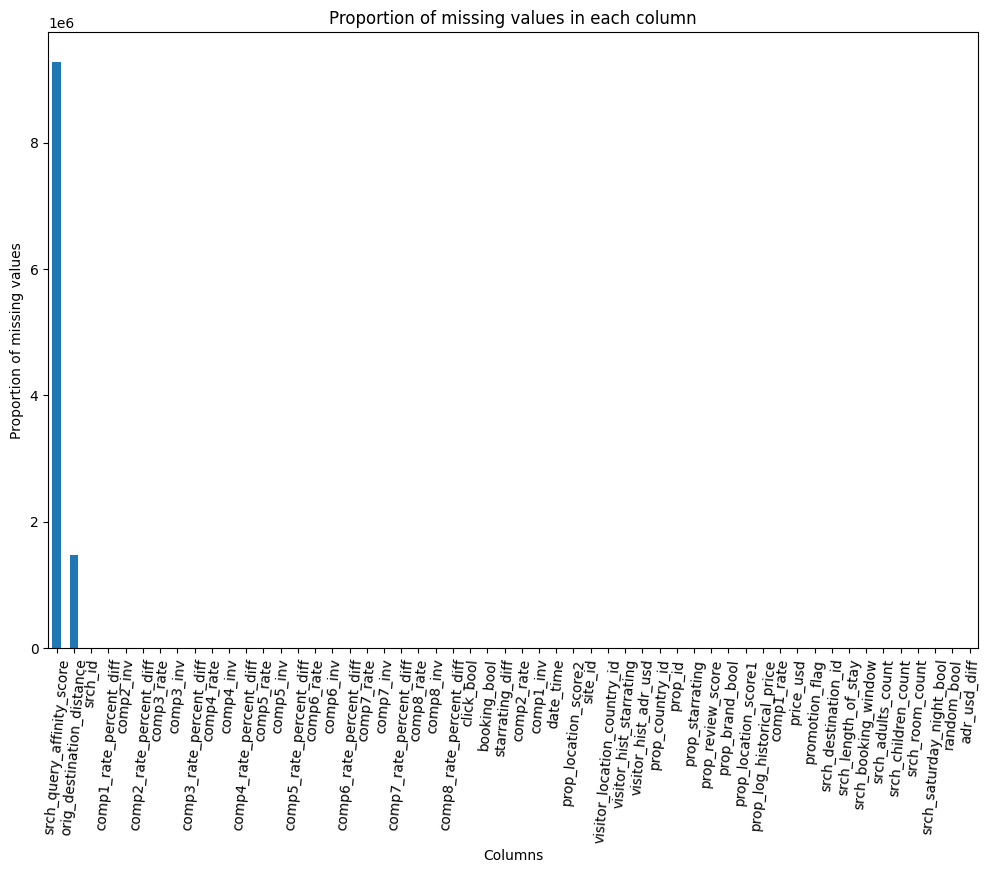

In [ ]:
#plot number of missing values in each column using bar plot matplotlib
missing_values = df_test_train.isnull().sum().sort_values(ascending=False)

#create barplot
plt.figure(figsize=(12,8))  # Optional: You can set the figure size
missing_values.plot(kind='bar')

#rotate the x-axis labels
plt.xticks(rotation=85)
plt.title('Proportion of missing values in each column')
plt.xlabel('Columns')
plt.ylabel('Proportion of missing values')
plt.show()